# Titanic: Machine Learning from Disaster

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

#### First , We will import the Titanic dataset

In [24]:
df = pd.read_csv("train.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The age column is missing some data so we need to fill them and so i decided to check the age histogram to see the distribution of the ages over the passengers.

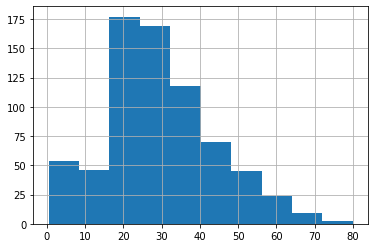

In [26]:
df["Age"].hist()

- we can notice that the ages take a gausian distribution shape , so we can fill the missing values with the average age.

In [28]:
# Age_average = df["Age"].mean()
# print("The average age is" ,Age_average)
# df.loc[df["Age"].isnull(),"Age"] = Age_average
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values = 'NaN' , strategy = 'mean')

q = mean_imputer.fit_transform(df[["Age"]])

df["Age"] = q

df.info()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

we will now check the correlation between the data

In [33]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


### From the correlation we can deduce some relations between the columns:
    
- there is an inverse relation between the Fare and Pclass as 1st class costs more than 3rd class.
- there is an inverse relation between the Pclass and Survived meaning first class passengers had a better chance of survival.
- there is a direct relation between the parch and SibSp columns as the parch repesents the number of children or parents aboard the ship and SibSp represents the number of siblings.

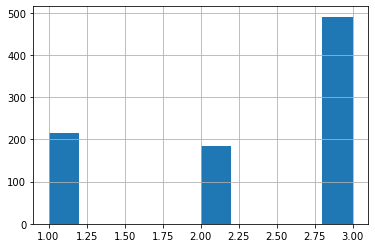

In [34]:
df["Pclass"].hist()

#### Survival Rate according to gender
- we will replace the gender column values from female and male to 1 and 0 respectivily and check the correlation between them and the survived column

In [33]:
df = df.replace({"Sex":"female"},1)
df = df.replace({"Sex":"male"},0)
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


- After changing the female and male values to 1 and 0 respectivily ,we are able to apply correlation on the gender column with the Survived column and as expected , the correlation shows a direct relationship between them implying that women had a higher survival rate than men which is logical since in these situations women are evactuated first.

In [34]:
df.drop(columns=["Cabin" , "Name" , "Embarked" , "Ticket"])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,NaN,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000
